<a href="https://colab.research.google.com/github/raghav9raghav/EDA/blob/main/theory_da_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
 rownames       0
id             0
read12         0
math12         0
female         0
asian          0
hispan         0
black          0
motheduc       0
fatheduc       0
lfaminc        0
hsgrad      1460
cathhs         0
parcath        0
dtype: int64


<ipython-input-4-19348312bd6c>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')


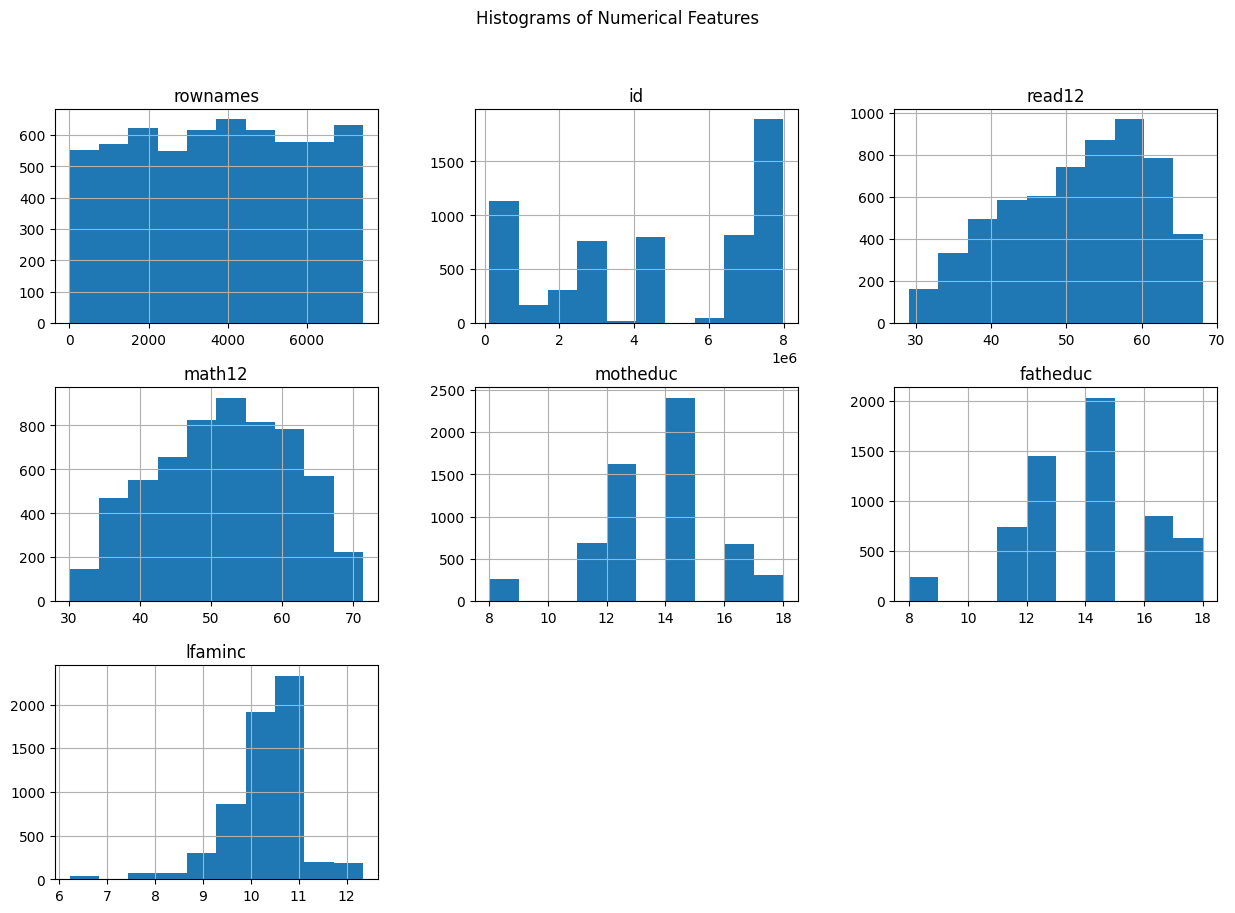

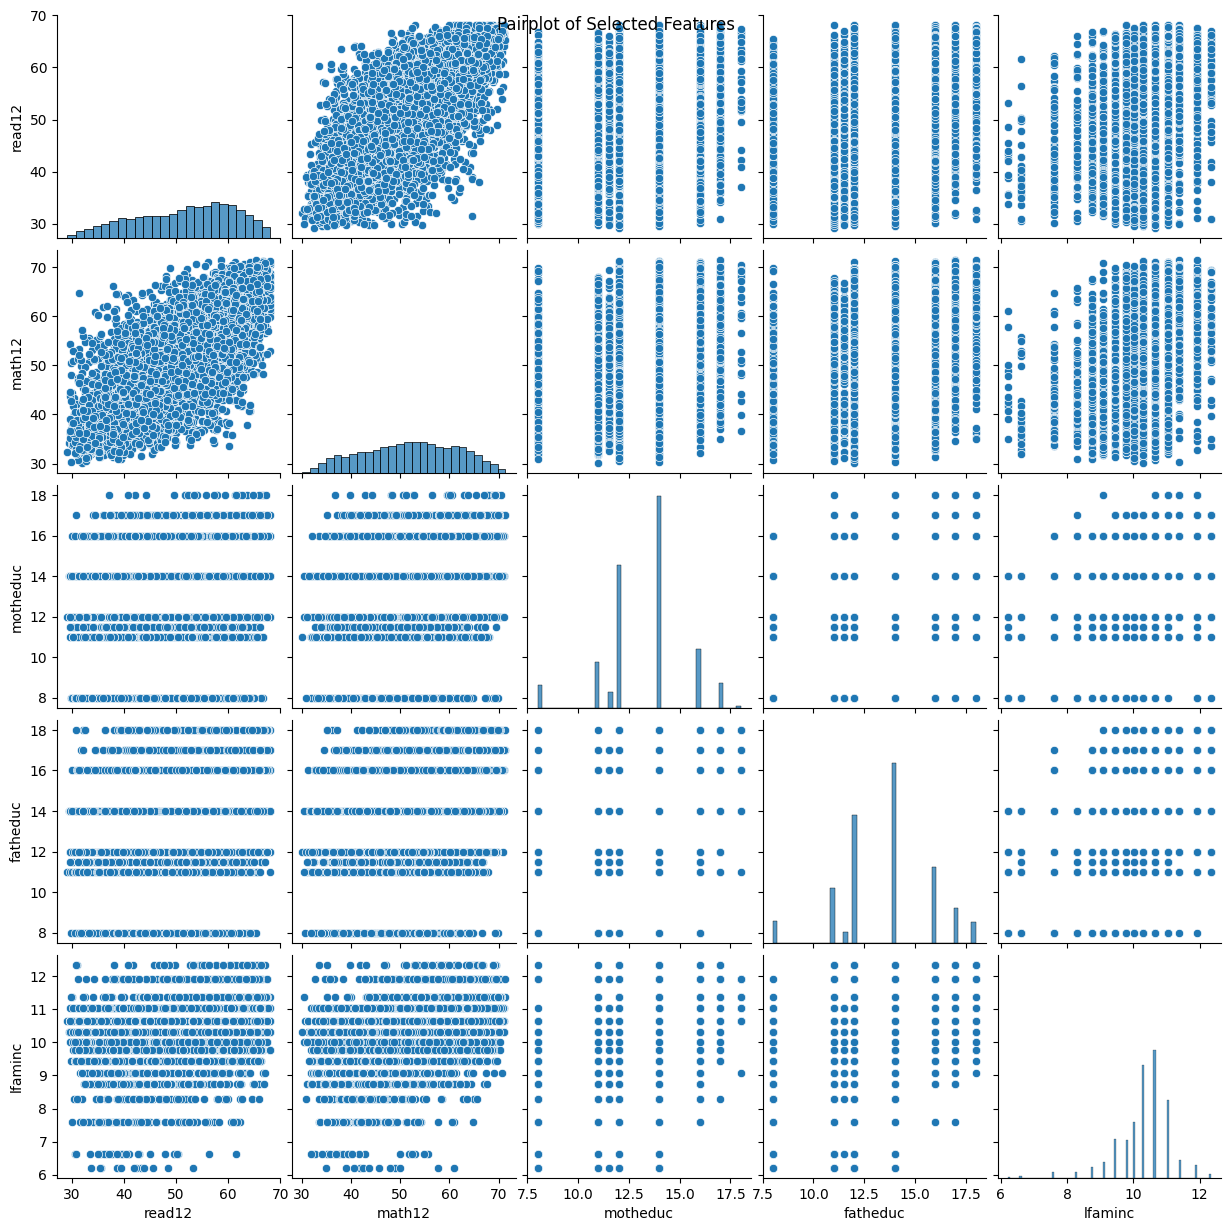

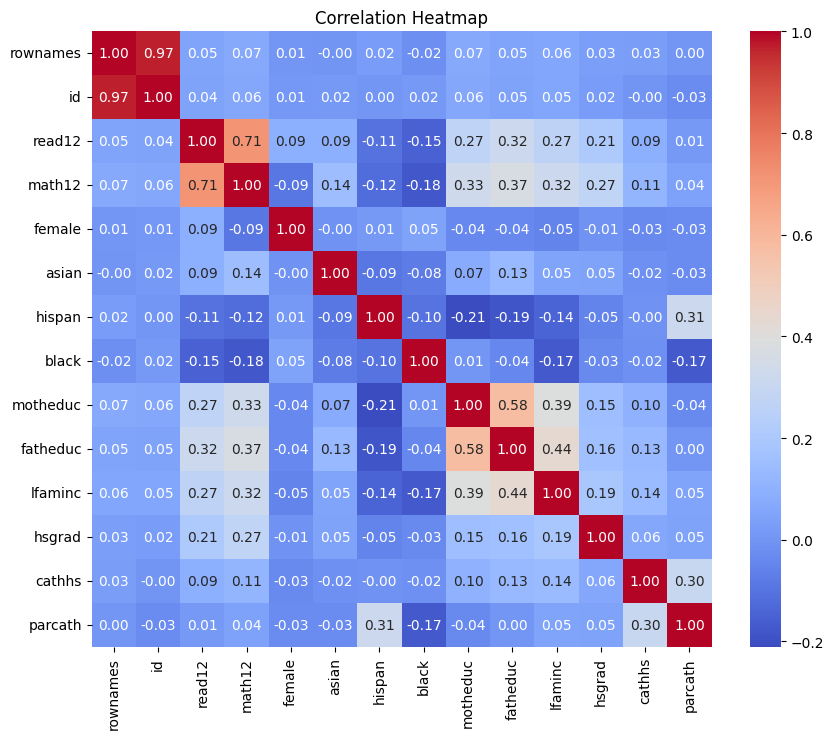

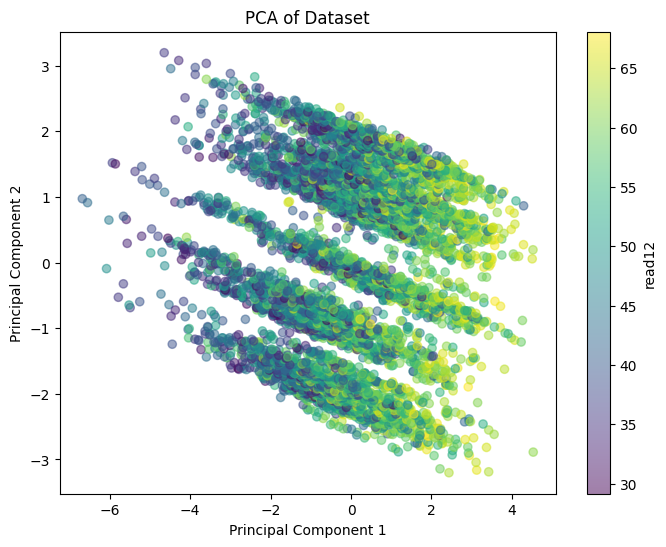

Mean Squared Error: 44.78
R-squared: 0.50


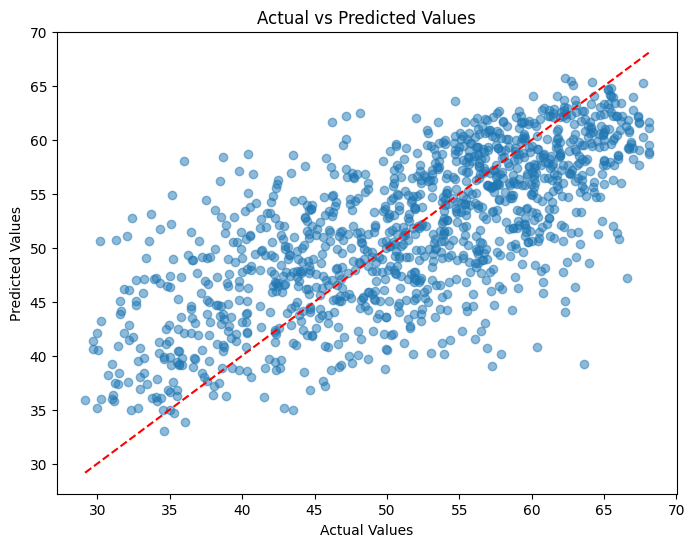

In [4]:
#Raghav Agarwal
#21BDS0192
#Dataset Name - Catholic.csv

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

# Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values for simplicity
df_cleaned = df.dropna()

# Data Handling
# Convert categorical variables to numerical if necessary
# Assuming 'female', 'asian', 'hispan', 'black', 'hsgrad', 'cathhs', 'parcath' are categorical
categorical_columns = ['female', 'asian', 'hispan', 'black', 'hsgrad', 'cathhs', 'parcath']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

# 1D Visualization
# Histograms for numerical features
df_cleaned.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# 2D Visualization
# Pairplot for selected features
selected_features = ['read12', 'math12', 'motheduc', 'fatheduc', 'lfaminc']
sns.pairplot(df_cleaned[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

# N-D Visualization
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time-series Analysis
# Check if there's a time-related column
# Assuming 'id' might represent time, but it doesn't seem to be a timestamp
# If there's no time-related data, we skip this part

# Dimensionality Reduction
# Separating features and target variable
X = df_cleaned.drop(columns=['read12'])  # Assuming 'read12' is the target variable
y = df_cleaned['read12']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(label='read12')
plt.show()

# Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation of Model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
